In [1]:
import csv
from nltk.tokenize import word_tokenize
import xlrd
import re
from nltk import bigrams
from nltk import ngrams
import operator
from collections import Counter
from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt

In [2]:
dataset = []

In [3]:
with open('dataset/process/analyze/temp.csv','r',encoding='Latin1')as f:
    data = csv.reader(f)
    for row in data:
      dataset.append(row[1])

In [4]:
emoticons_str = r"""
    (?:
        [:=;] # Eyes
        [oO\-]? # Nose (optional)
        [D\)\]\(\]/\\OpP] # Mouth
    )"""

In [5]:
def preprocess_fornothash(s, lowercase=True):
    tokens = tokenize_fornothash(s)
    if lowercase:
        tokens = [token if emoticon_re.search(token) else token.lower() for token in tokens]
    return tokens

def tokenize_fornothash(s):
    return tokens_re_fornothash.findall(s)


regex_str_fornothash = [
    emoticons_str,
    r'<[^>]+>',  # HTML tags
    r'(?:@[\w_]+)',  # @-mentions
    #r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)",  # hash-tags
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+',  # URLs

    r'(?:(?:\d+,?)+(?:\.?\d+)?)',  # numbers
    r"(?:[a-z][a-z'\-_]+[a-z])",  # words with - and '
    r'(?:[\w_]+)',  # other words
    r'(?:\S)'  # anything else
]

tokens_re_fornothash = re.compile(r'(' + '|'.join(regex_str_fornothash) + ')', re.VERBOSE | re.IGNORECASE)
emoticon_re = re.compile(r'^' + emoticons_str + '$', re.VERBOSE | re.IGNORECASE)

In [6]:
def preprocess_forhash(s, lowercase=True):
    tokens = tokenize_forhash(s)
    if lowercase:
        tokens = [token if emoticon_re.search(token) else token.lower() for token in tokens]
    return tokens

def tokenize_forhash(s):
    return tokens_re_forhash.findall(s)

regex_str_forhash = [
    emoticons_str,
    r'<[^>]+>',  # HTML tags
    r'(?:@[\w_]+)',  # @-mentions
    r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)",  # hash-tags
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+',  # URLs

    r'(?:(?:\d+,?)+(?:\.?\d+)?)',  # numbers
    r"(?:[a-z][a-z'\-_]+[a-z])",  # words with - and '
    r'(?:[\w_]+)',  # other words
    r'(?:\S)'  # anything else
]

tokens_re_forhash = re.compile(r'(' + '|'.join(regex_str_forhash) + ')', re.VERBOSE | re.IGNORECASE)
emoticon_re = re.compile(r'^' + emoticons_str + '$', re.VERBOSE | re.IGNORECASE)

In [7]:
punctuation = list(string.punctuation)
unnecssary = ['The','tourism','I','rt', 'via','...','â','click']
unnecssary_hash = ['#','#tourism']
ascii_words = ['\x92','\x96']
years = ['2018']
stop = stopwords.words('english') + punctuation + unnecssary + ascii_words + years + unnecssary_hash


count_all = Counter()
count_hash = Counter()
count_bigram = Counter()
count_trigram = Counter()

for x in range(1, 1000):
    value = dataset[x]
    #print(value)
    #print(preprocess(value))

    terms_all = [term for term in preprocess_fornothash(value) if term not in stop]
    
    terms_bigram = bigrams(terms_all)
    
    terms_trigram = ngrams(terms_all, 3)

    #terms_single = set(terms_all)

    terms_hash = [term for term in preprocess_forhash(value)
                  if term.startswith('#') if term not in stop]

    count_all.update(terms_all)
    count_hash.update(terms_hash)  
    count_bigram.update(terms_bigram)
    count_trigram.update(terms_trigram)

In [8]:
popular_common_words = count_all.most_common(10)
popular_hash_words = count_hash.most_common(10)
popular_bigrams_words = count_bigram.most_common(10)
popular_trigrams_words = count_trigram.most_common(10)

print("common words")
for x in popular_common_words:
    print(x)
    
print("\nhash words")
for x in popular_hash_words:
    print(x)
    
print("\nbigrams words")
for x in popular_bigrams_words:
    print(x)
    
print("\ntrigrams words")
for x in popular_trigrams_words:
    print(x)

common words
('travel', 254)
('new', 113)
('year', 77)
('amp', 50)
('vacation', 46)
('tourist', 44)
('happy', 40)
('jobs', 36)
('holiday', 35)
('gt', 35)

hash words
('#travel', 184)
('#vacation', 41)
('#wanderlust', 30)
('#traveling', 24)
('#holiday', 24)
('#tourist', 24)
('#instatravel', 22)
('#roadtrip', 20)
('#photooftheday', 20)
('#travelgram', 20)

bigrams words
(('new', 'year'), 45)
(('happy', 'new'), 26)
(('social', 'media'), 18)
(('travel', 'wanderlust'), 18)
(('new', 'jobs'), 17)
(('travel', 'jobs'), 17)
(('apply', 'link'), 17)
(('link', 'gt'), 17)
(('picton', 'instagram'), 16)
(('instagram', 'travel'), 16)

trigrams words
(('happy', 'new', 'year'), 26)
(('apply', 'link', 'gt'), 17)
(('picton', 'instagram', 'travel'), 16)
(('instagram', 'travel', 'roadtrip'), 16)
(('travel', 'roadtrip', 'amazon'), 16)
(('roadtrip', 'amazon', 'author'), 16)
(('amazon', 'author', 'writer'), 16)
(('hydropower', 'station', 'raises'), 16)
(('station', 'raises', 'alarm'), 16)
(('raises', 'alarm', '

In [9]:
y = 0
word_set = []
word_set_vacation = []
for x in range(100):
    word_set.append(0)
def word_count(str,specific_word):
    global word_set
    words = str.split()
    
    for word in words:
        if specific_word in word:
            word_set[y] += 1

In [10]:
for x in range(1, 10000):
    value = dataset[x]
    word_count(dataset[x],'travel')
    if(x % 100 == 0):
        y += 1
        
print(word_set)

[48, 28, 22, 27, 44, 64, 50, 36, 41, 31, 38, 41, 21, 40, 26, 39, 33, 23, 34, 43, 46, 27, 44, 50, 35, 16, 44, 69, 19, 41, 38, 18, 28, 36, 17, 40, 26, 22, 18, 23, 19, 23, 26, 22, 22, 29, 32, 26, 53, 30, 30, 22, 58, 33, 16, 33, 46, 42, 26, 47, 37, 34, 33, 30, 41, 25, 38, 21, 25, 24, 38, 28, 23, 40, 20, 27, 26, 31, 17, 16, 23, 16, 19, 43, 32, 24, 39, 46, 40, 16, 35, 28, 70, 45, 31, 58, 18, 54, 40, 51]


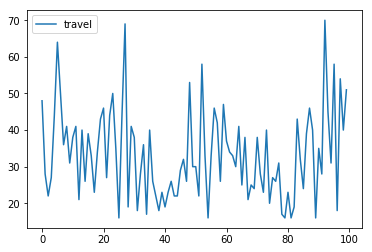

In [11]:
X = range(100)
plt.plot(X, word_set )
plt.legend(['travel', 'y = 2x'], loc='upper left')
plt.show()